In [36]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
IN_PATH_indeed = os.path.join('../data', 'job_list.csv')
indeed = pd.read_csv(IN_PATH_indeed)

In [39]:
state_counts = indeed.groupby(['location','title'])['job_id'].size().unstack(fill_value=0)

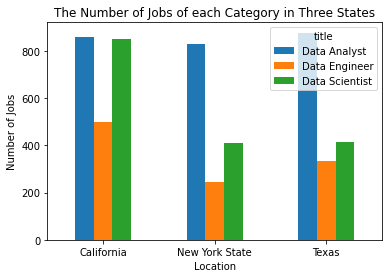

In [48]:
state_counts.plot.bar(rot=0)
plt.title('The Number of Jobs of each Category in Three States')
plt.ylabel('Number of Jobs')
plt.xlabel('Location')
plt.savefig('../figure/figure2.png', bbox_inches = 'tight', dpi=100)

In [41]:
company_top20 = indeed.groupby(['company_name'])['job_id'].count().to_frame().sort_values(['job_id'], ascending=[ False]).head(20)
company_top20

,job_id
company_name,
"JPMorgan Chase Bank, N.A.",76
Visa,56
Deloitte,54
Amazon.com Services LLC,52
Citi,40
Google,33
KPMG,32
IBM,26
PRICE WATERHOUSE COOPERS,23


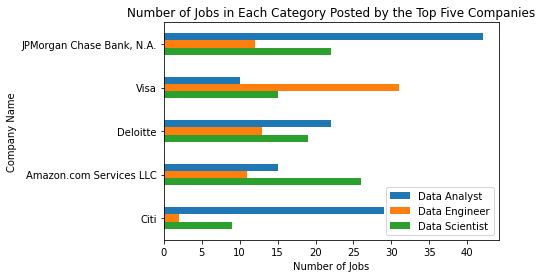

In [49]:
company_top5 = company_top20.head(5)
company_top5_2= indeed.groupby(['company_name','title'])['job_id'].size().unstack(fill_value=0)
company_top5_count = pd.merge(company_top5, company_top5_2, how = 'left', on = ['company_name'])
company_top5_count = company_top5_count[['Data Analyst','Data Engineer','Data Scientist']]
company_top5_count.plot(kind='barh')
plt.title('Number of Jobs in Each Category Posted by the Top Five Companies')
plt.xlabel('Number of Jobs')
plt.ylabel('Company Name')
ax=plt.gca()
ax.invert_yaxis() 
plt.savefig('../figure/figure3.png', bbox_inches = 'tight', dpi=100)

In [43]:
IN_PATH_industry = os.path.join('../data', '300_job_industry_skill.csv')
industry = pd.read_csv(IN_PATH_industry)

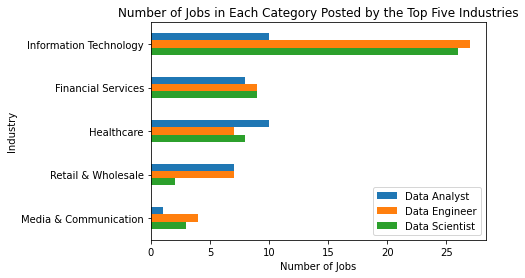

In [50]:
industry_top5 = industry.groupby(['Industry'])['jid'].count().to_frame().sort_values(['jid'], ascending=[ False]).head(5)
industry_top5
industry_top5_2= industry.groupby(['Industry','Title'])['jid'].size().unstack(fill_value=0)
industry_top5_count = pd.merge(industry_top5, industry_top5_2, how = 'left', on = ['Industry'])
industry_top5_count = industry_top5_count[['Data Analyst','Data Engineer','Data Scientist']]
industry_top5_count.plot(kind='barh')
plt.title('Number of Jobs in Each Category Posted by the Top Five Industries')
plt.xlabel('Number of Jobs')
plt.ylabel('Industry')
ax=plt.gca()
ax.invert_yaxis() 
plt.savefig('../figure/figure4.png', bbox_inches = 'tight', dpi=100)